<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_11_ProjEleven_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [1]:
# utils
import os, sys, warnings
import pylab as pl
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
from functools import partial
from collections import OrderedDict
# sklearn
import sklearn
from sklearn import (mixture,
                     manifold,
                     datasets,
                     preprocessing)
from sklearn.decomposition import PCA
# vis
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from IPython import display

In [2]:
print(sys.version)
print(sys.executable)
print("sklearn:", sklearn.__version__)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
/usr/bin/python3
sklearn: 1.5.2


In [3]:
warnings.filterwarnings('ignore')

## Mixture Models

In [4]:
X, y = datasets.load_iris(return_X_y=True)

### Gaussian Mixture Model

In [5]:
gm = mixture.GaussianMixture(n_components=3)
gm.fit(X[:, :2])
y_pred = gm.predict(X[:, :2])

In [6]:
X0_gm, X1_gm, X2_gm = [X[y_pred == i, :2] for i in range(3)]

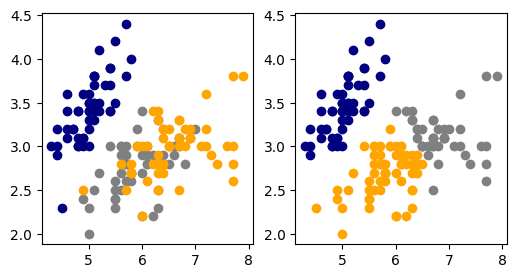

In [7]:
colors = ["navy", "gray", "orange"]

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

for i, color in enumerate(colors):
    ax[0].scatter(X[y == i, 0], X[y == i, 1], c=color)
    ax[1].scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=colors[i % len(colors)])

### Bayesian Gaussian Mixture Model

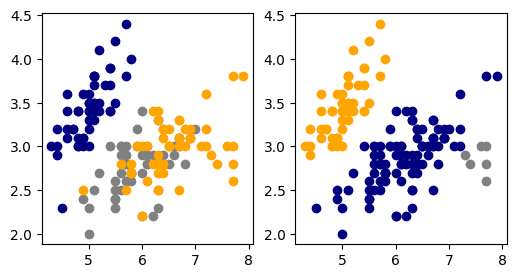

In [8]:
bgm = mixture.BayesianGaussianMixture(n_components=3)
bgm.fit(X[:, 0:2])

y_pred = bgm.predict(X[:, :2])

colors = ["navy", "gray", "orange"]

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

for i, color in enumerate(colors):
    ax[0].scatter(X[y == i, 0], X[y == i, 1], c=color)
    ax[1].scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=colors[i % len(colors)])

## Manifolds

In [9]:
# X, y = datasets.load_digits(return_X_y=True)

# def visualize_tsne_with_iterations(X, y, start_iter=300, end_iter=401, step=5, perplexity=30):
#     """
#     Visualizes t-SNE results for various iterations.

#     Parameters:
#     X : np.ndarray
#         Input data (features).
#     y : np.ndarray
#         Labels corresponding to the input data for coloring the points.
#     start_iter : int
#         Starting number of iterations for t-SNE.
#     end_iter : int
#         Ending number of iterations for t-SNE.
#     step : int
#         Step size for iterations.
#     perplexity : float
#         Perplexity parameter for t-SNE.
#     """

#     for n_iter in tqdm(range(start_iter, end_iter, step), desc="Processing t-SNE iterations"):

#         tsne_result = manifold.TSNE(n_components=2, n_iter=n_iter, perplexity=perplexity, random_state=0).fit_transform(X)

#         for i, label in enumerate(y.tolist()):
#             if i % 10000 == 0:
#               fig = plt.figure(figsize=(5, 5))
#               scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='Spectral', alpha=0.7)
#               plt.annotate(str(label), (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)

#         plt.xlim(-20, 20)
#         plt.ylim(-20, 20)
#         plt.axis("off")

#         plt.show()
#         plt.clf()

# visualize_tsne_with_iterations(X, y)

In [10]:
# for i in range(250, 501, 2):
#     fig = plt.figure(figsize=(5,5))
#     xe = manifold.TSNE(n_components=2, n_iter=i, perplexity=30, random_state=0).fit_transform(X)
#     plt.scatter(xe[:,0], xe[:,1], c=y)
#     for i, txt in enumerate(y.tolist()):
#         if (i%20==0):
#             plt.annotate(str(txt), (xe[i,0], xe[i,1]))
#     plt.xlim(-20,20)
#     plt.ylim(-20,20)
#     plt.axis("off")
#     display.clear_output(wait=True)
#     display.display(pl.gcf())
#     plt.clf()
#     plt.cla()
#     plt.close("all")

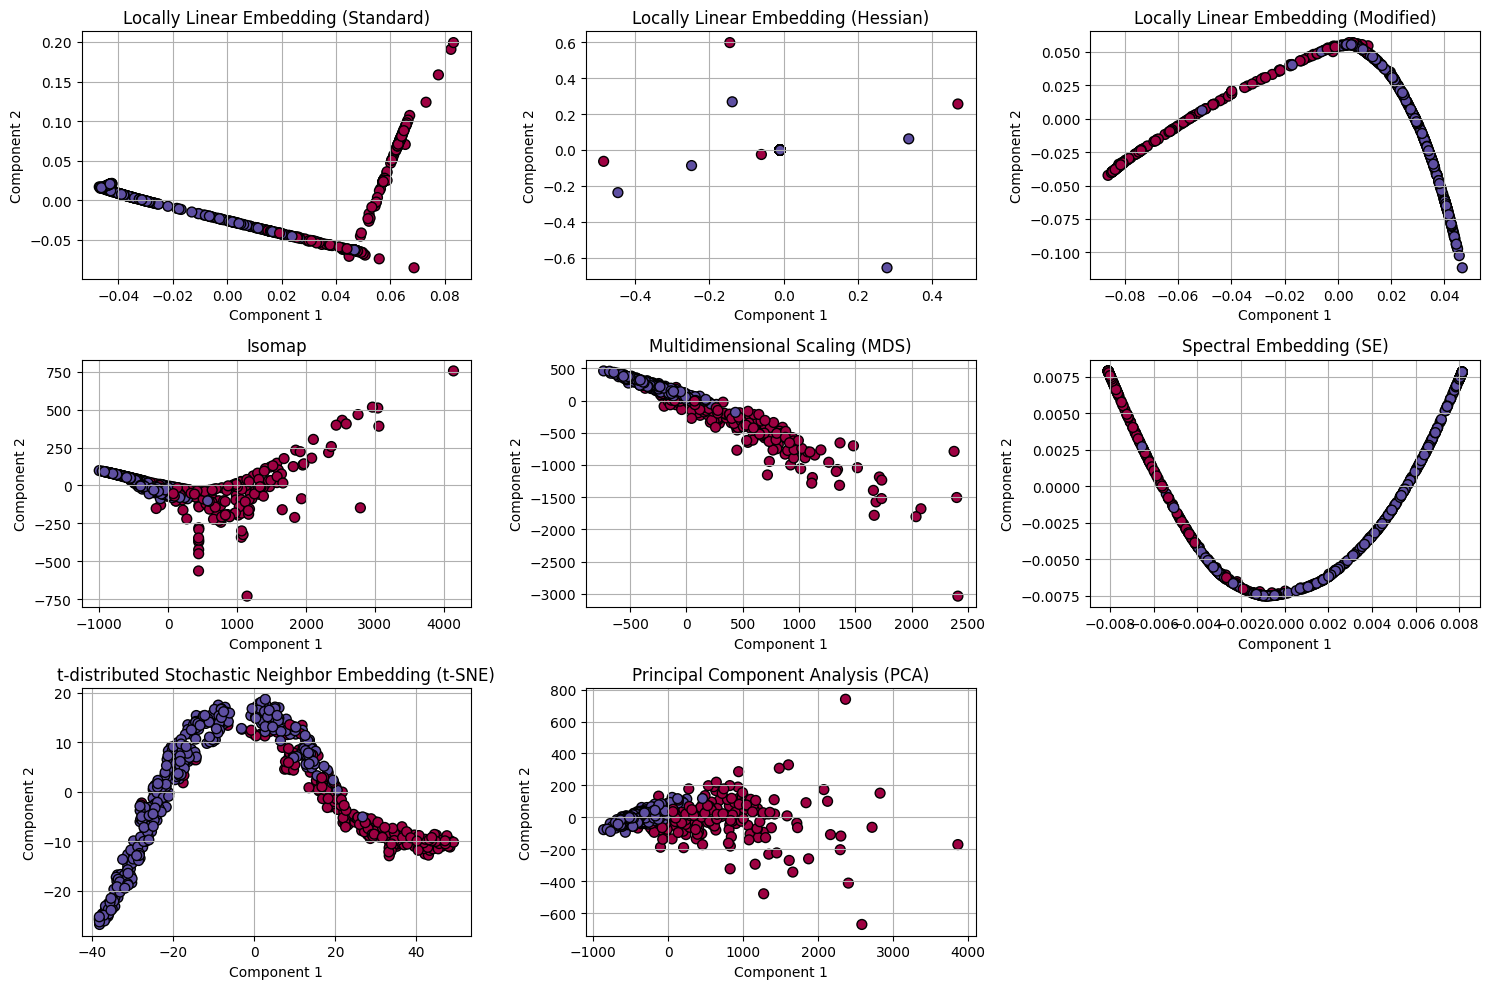

In [11]:
def plot_dimensionality_reduction_curves(X, y):
    """
    Visualizes the results of various dimensionality reduction techniques on the dataset.

    Parameters:
    X : np.ndarray
        Input data (features) to be reduced.
    y : np.ndarray
        Labels corresponding to the input data for coloring the points.
    """

    models = [
        ("Locally Linear Embedding (Standard)", manifold.LocallyLinearEmbedding(method="standard")),
        ("Locally Linear Embedding (Hessian)", manifold.LocallyLinearEmbedding(method="hessian", eigen_solver="dense", n_neighbors=8)),
        ("Locally Linear Embedding (Modified)", manifold.LocallyLinearEmbedding(method="modified")),
        ("Isomap", manifold.Isomap()),
        ("Multidimensional Scaling (MDS)", manifold.MDS()),
        ("Spectral Embedding (SE)", manifold.SpectralEmbedding()),
        ("t-distributed Stochastic Neighbor Embedding (t-SNE)", manifold.TSNE()),
        ("Principal Component Analysis (PCA)", PCA(n_components=2))
        ]

    plt.figure(figsize=(15, 10))

    for i, (label, model) in enumerate(models):

        Y = model.fit_transform(X)

        ax = plt.subplot(3, 3, i + 1)
        scatter = ax.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k', s=50)
        ax.set_title(label)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

X, y = datasets.load_breast_cancer(return_X_y=True)
plot_dimensionality_reduction_curves(X, y)